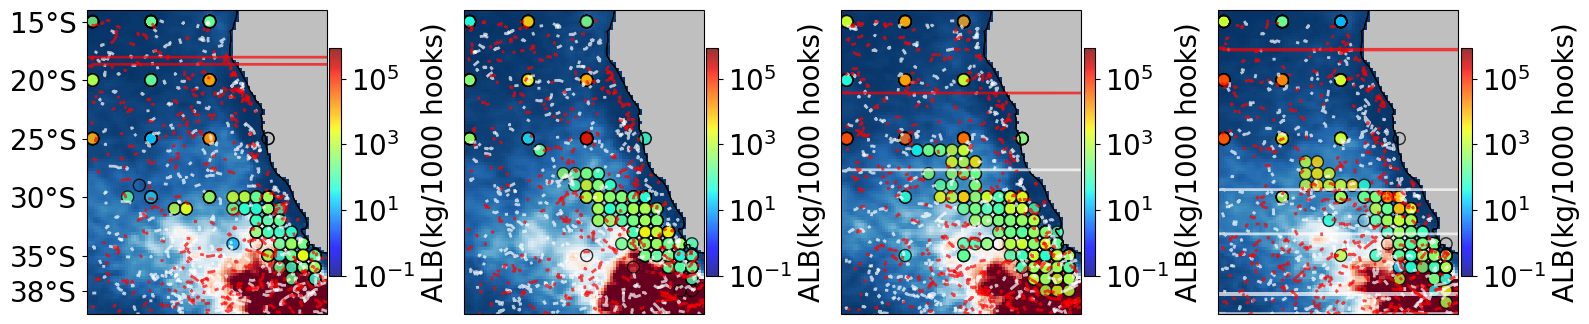

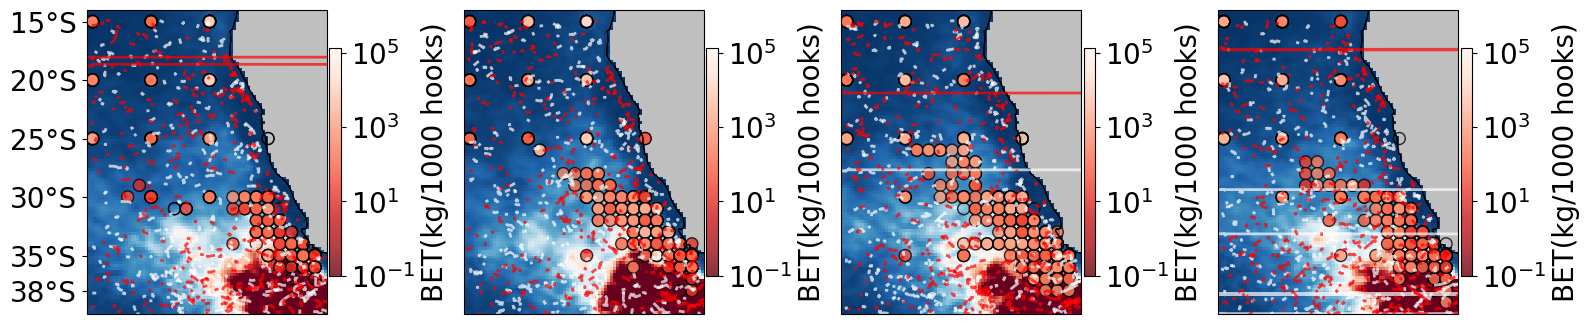

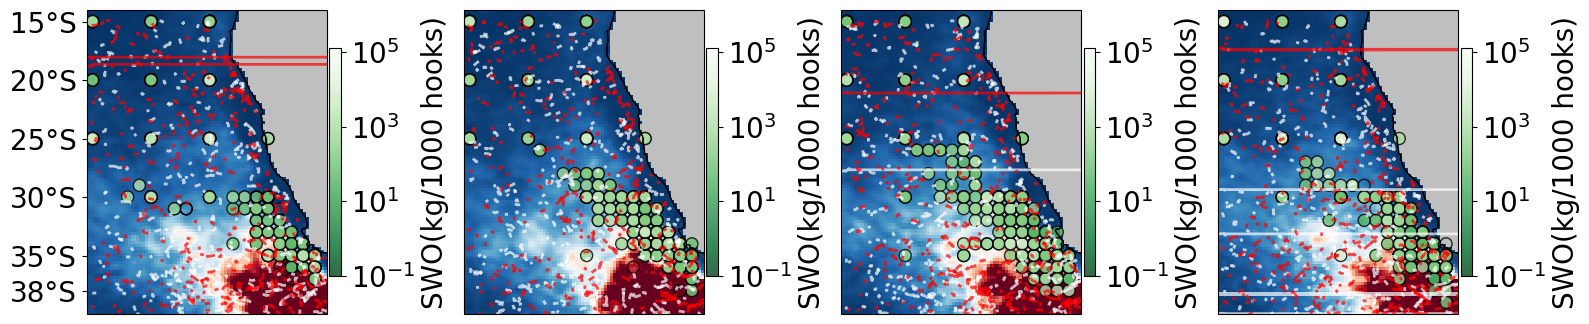

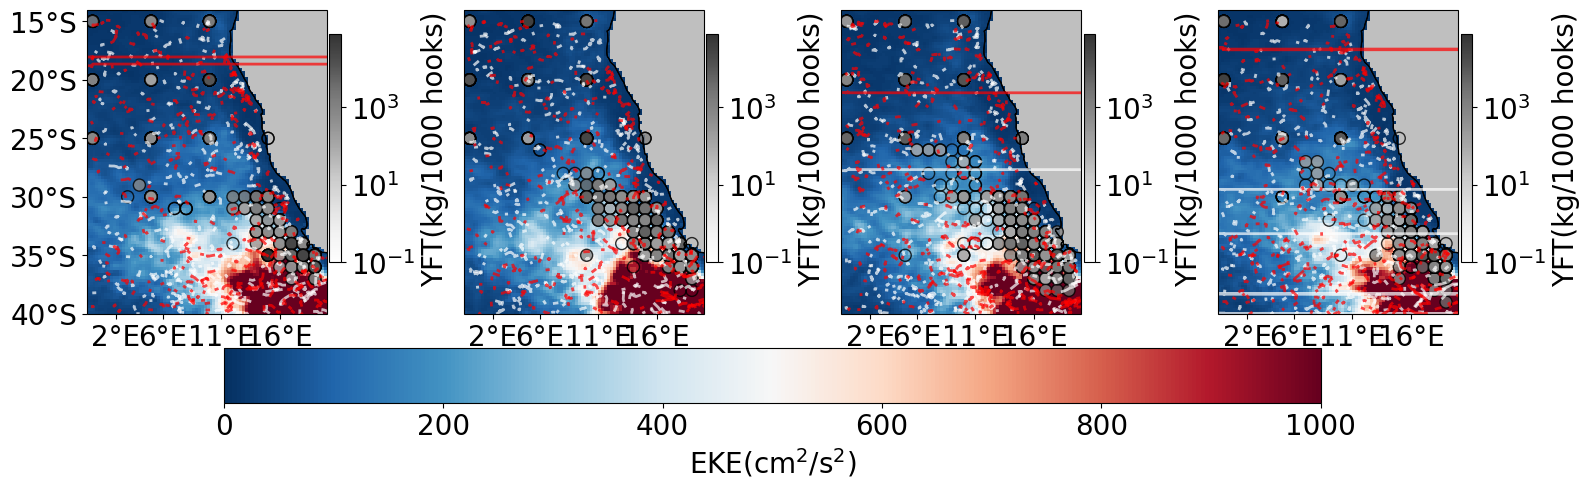

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import netCDF4 as nc
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator

# Load the NetCDF file
ds = xr.open_dataset('D:/2019-2020-2021/data/eke_2001_2022.nc')
tuna_data1 = pd.read_csv('D:/2019-2020-2021/data/tuna_data_namzaf2001_2022.csv', encoding='latin-1')
#data_eddies = pd.read_csv('D:/2019-2020-2021/data/Area1_anticyclone_summer_01_2022.csv')
data_eddies1 = pd.read_csv('D:/2019-2020-2021/data/cyclone_filtered_2001_2022.csv')
data_eddies2 = pd.read_csv('D:/2019-2020-2021/data/anticyclone_filtered_2001_2022.csv')
# Extract variables
eke = ds['eke']  # Eddy Kenecy Energy
time = ds['time']
lat = ds['latitude']
lon = ds['longitude']
time1 = tuna_data1['time']
Effort = tuna_data1['Effort']

tuna_data1['time'] = pd.to_datetime(tuna_data1['time'])
tuna_data1['month'] = tuna_data1['time'].dt.month
data_eddies1['time'] = pd.to_datetime(data_eddies1['time'])
data_eddies1['month'] = data_eddies1['time'].dt.month
data_eddies2['time'] = pd.to_datetime(data_eddies2['time'])
data_eddies2['month'] = data_eddies2['time'].dt.month

# Créer une figure avec sous-graphiques pour chaque mois
fig1, axs = plt.subplots(1, 4, figsize=(16, 6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

def format_coordinate(coord, coordinate_type='lat'):
    if coordinate_type == 'lat':
      
       if coord < 0:
           return f'{abs(coord)}°S'
       else:
           return f'{abs(coord)}°N'
    


y_ticks = [-38, -35, -30, -25, -20, -15]
y_ticks_labels = [format_coordinate(y, 'lat') for y in y_ticks]
#y_ticks_labels = [f'{y}°S' for y in y_ticks]

x_ticks = [ 0, 10, 20]
x_ticks_labels = [f'{x}°E' for x in x_ticks]

# List of month names for titles
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
          'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# Rearrange the months to start with March as in your image
#month_order = [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
month_order = [2, 4, 6, 8]
ordered_months = [months[i] for i in month_order]

# Calculer les valeurs min et max pour une échelle de couleur cohérente
vmin = np.nanmin(eke.values)
vmax = np.nanmax(eke.values)

# Calculate min and max values ​​for a consistent color scale
#cmap = plt.cm.jet
cmap = plt.cm.RdBu_r
#cmap = plt.cm.autumn
# Traiter chaque mois
for i, (month_idx, month_name) in enumerate(zip(month_order, ordered_months)):
    ax = axs[i]
    
    # Select data for this month (average over all years)
    monthly_data = eke.groupby('time.month').mean().sel(month=month_idx+1)
    month_data = tuna_data1[tuna_data1['month'] == month_idx+1]
    month_data1 = data_eddies1[data_eddies1['month'] == month_idx+1]
    month_data2 = data_eddies2[data_eddies2['month'] == month_idx+1]
    # Tracer la carte
    im = ax.pcolormesh(lon, lat, monthly_data, 
                      cmap=cmap, vmin=0, vmax=1000, 
                      transform=ccrs.PlateCarree())
    norm1 = colors.LogNorm(vmin=max(0.1, tuna_data1['Catch_ALB'].min()), 
                     vmax=tuna_data1['Catch_ALB'].max())
    scatter1 = ax.scatter(month_data['longitude'], month_data['latitude'], 
                     c=month_data['Catch_ALB'], norm=norm1, cmap='jet', 
                     s=75, alpha=0.8, edgecolor='k', linewidth=1)
    cbar1 = plt.colorbar(scatter1, ax=ax, pad=0.01, shrink=0.4)
    cbar1.set_label('ALB(kg/1000 hooks)', fontsize=20)
    cbar1.ax.tick_params(labelsize=20)
    track = month_data1['track'].values
    for track in month_data1['track'].unique():
         data_eddy = month_data1[month_data1['track'] == track]
         ax.plot(data_eddy['longitude'], data_eddy['latitude'], 'white', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    
    for track in month_data2['track'].unique():
         data_eddi = month_data2[month_data2['track'] == track]
         ax.plot(data_eddi['longitude'], data_eddi['latitude'], 'r-', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    # Ajouter les lignes côtières
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.set_xlim([-0.5, 20])
    ax.set_ylim([-40, -14])
    
    # Configurer les graduations sur les axes
    #ax.set_xticks(np.arange(0, 20, 5))
    #ax.set_yticks(np.arange(-40, -15, 5))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x)}°E")
    #ax.yaxis.set_major_formatter(lambda y, pos: f"{int(y)}°N")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks_labels, fontsize = 20) 
    ax.set_xticks(x_ticks, minor=False)
    ax.set_xticklabels(x_ticks_labels, minor=False, fontsize = 20)
    #ax.tick_params(axis= 'both', which='both',
               #top=True, bottom=True,
               #left=True, right=True)
   # ax.xaxis.tick_top()
   # ax.xaxis.set_label_position('top')
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)

    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, alpha=0.5, edgecolor='black', color='gray')
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    # Ajouter le titre pour chaque mois
    #ax.set_title(month_name)
    
    # Ajouter les graduations d'axes seulement pour certains graphiques
    if i >=4:  # Pour les 3 derniers graphiques (dernière ligne)
         #if i >=0 and i <3:  # Pour les 3 derniers graphiques (dernière ligne)
         ax.xaxis.set_visible(True)
    else:
        ax.xaxis.set_visible(False)
        
    if i % 4 == 0:  # Pour les graphiques de la première colonne
        ax.yaxis.set_visible(True)
    else:
        ax.yaxis.set_visible(False)
# Ajuster la mise en page
plt.tight_layout()

# Ajouter une barre de couleur commune
#cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
#cax = fig.add_axes([0.35, 0.02, 0.3, 0.01])
#cb = fig.colorbar(im, ax=axs, orientation='vertical')
#cb.set_label('SLA (m)')
#cbar = plt.colorbar(im, cax=cax, orientation='horizontal', shrink=0.8, pad=0.5, label='SSH-Anomaly(m)')
#cbar = fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.8, pad=0.02)
#cbar.set_label('EKE(cm$^{2}$/m$^{2}$)', fontsize=15)
#cbar.ax.tick_params(labelsize=15)

# Sauvegarder et afficher
# Créer une figure avec sous-graphiques pour chaque mois
fig2, axs = plt.subplots(1, 4, figsize=(16, 6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

def format_coordinate(coord, coordinate_type='lat'):
    if coordinate_type == 'lat':
      
       if coord < 0:
           return f'{abs(coord)}°S'
       else:
           return f'{abs(coord)}°N'
    


y_ticks = [-38, -35, -30, -25, -20, -15]
y_ticks_labels = [format_coordinate(y, 'lat') for y in y_ticks]
#y_ticks_labels = [f'{y}°S' for y in y_ticks]

x_ticks = [ 0, 10, 20]
x_ticks_labels = [f'{x}°E' for x in x_ticks]

# Liste des noms de mois pour les titres
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
          'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# Réorganiser les mois pour commencer par Mars comme dans votre image
#month_order = [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
month_order = [2, 4, 6, 8]
ordered_months = [months[i] for i in month_order]

# Calculer les valeurs min et max pour une échelle de couleur cohérente
vmin = np.nanmin(eke.values)
vmax = np.nanmax(eke.values)

# Créer une palette de couleurs similaire à celle de l'image
#cmap = plt.cm.jet
cmap = plt.cm.RdBu_r
#cmap = plt.cm.autumn
# Traiter chaque mois
for i, (month_idx, month_name) in enumerate(zip(month_order, ordered_months)):
    ax = axs[i]
    
    # Sélectionner les données pour ce mois (moyenne sur toutes les années)
    monthly_data = eke.groupby('time.month').mean().sel(month=month_idx+1)
    month_data = tuna_data1[tuna_data1['month'] == month_idx+1]
    month_data1 = data_eddies1[data_eddies1['month'] == month_idx+1]
    month_data2 = data_eddies2[data_eddies2['month'] == month_idx+1]
    # Tracer la carte
    im = ax.pcolormesh(lon, lat, monthly_data, 
                      cmap=cmap, vmin=0, vmax=1000, 
                      transform=ccrs.PlateCarree())
    norm1 = colors.LogNorm(vmin=max(0.1, tuna_data1['Catch_BET'].min()), 
                     vmax=tuna_data1['Catch_BET'].max())
    scatter2 = ax.scatter(month_data['longitude'], month_data['latitude'], 
                     c=month_data['Catch_BET'], norm=norm1, cmap='Reds_r', 
                     s=75, alpha=0.8, edgecolor='k', linewidth=1)
    
    cbar2 = plt.colorbar(scatter2, ax=ax, pad=0.01, shrink=0.4)
    cbar2.set_label('BET(kg/1000 hooks)', fontsize=20)
    cbar2.ax.tick_params(labelsize=20)
    track = month_data1['track'].values
    for track in month_data1['track'].unique():
         data_eddy = month_data1[month_data1['track'] == track]
         ax.plot(data_eddy['longitude'], data_eddy['latitude'], 'white', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    
    for track in month_data2['track'].unique():
         data_eddi = month_data2[month_data2['track'] == track]
         ax.plot(data_eddi['longitude'], data_eddi['latitude'], 'r-', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    # Ajouter les lignes côtières
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.set_xlim([-0.5, 20])
    ax.set_ylim([-40, -14])
    
    # Configurer les graduations sur les axes
    #ax.set_xticks(np.arange(0, 20, 5))
    #ax.set_yticks(np.arange(-40, -15, 5))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x)}°E")
    #ax.yaxis.set_major_formatter(lambda y, pos: f"{int(y)}°N")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks_labels, fontsize = 20) 
    ax.set_xticks(x_ticks, minor=False)
    ax.set_xticklabels(x_ticks_labels, minor=False, fontsize = 20)
   # ax.xaxis.tick_top()
   # ax.xaxis.set_label_position('top')
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)

    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, alpha=0.5, edgecolor='black', color='gray')
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    # Ajouter le titre pour chaque mois
    #ax.set_title(month_name)
    
    # Ajouter les graduations d'axes seulement pour certains graphiques
    if i >=4:  # Pour les 3 derniers graphiques (dernière ligne)
         #if i >=0 and i <3:  # Pour les 3 derniers graphiques (dernière ligne)
         ax.xaxis.set_visible(True)
    else:
        ax.xaxis.set_visible(False)
        
    if i % 4 == 0:  # Pour les graphiques de la première colonne
        ax.yaxis.set_visible(True)
    else:
        ax.yaxis.set_visible(False)

# Ajuster la mise en page
plt.tight_layout()

# Ajouter une barre de couleur commune
#cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
#cax = fig.add_axes([0.35, 0.02, 0.3, 0.01])
#cb = fig.colorbar(im, ax=axs, orientation='vertical')
#cb.set_label('SLA (m)')
#cbar = plt.colorbar(im, cax=cax, orientation='horizontal', shrink=0.8, pad=0.5, label='SSH-Anomaly(m)')
#cbar = fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.8, pad=0.02)
#cbar.set_label('EKE(cm$^{2}$/m$^{2}$)', fontsize=15)
#cbar.ax.tick_params(labelsize=15)

# Sauvegarder et afficher
# Créer une figure avec sous-graphiques pour chaque mois
fig3, axs = plt.subplots(1, 4, figsize=(16, 6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

def format_coordinate(coord, coordinate_type='lat'):
    if coordinate_type == 'lat':
      
       if coord < 0:
           return f'{abs(coord)}°S'
       else:
           return f'{abs(coord)}°N'
    


y_ticks = [-38, -35, -30, -25, -20, -15]
y_ticks_labels = [format_coordinate(y, 'lat') for y in y_ticks]
#y_ticks_labels = [f'{y}°S' for y in y_ticks]

x_ticks = [ 0, 10, 20]
x_ticks_labels = [f'{x}°E' for x in x_ticks]

# Liste des noms de mois pour les titres
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
          'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# Réorganiser les mois pour commencer par Mars comme dans votre image
#month_order = [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
month_order = [2, 4, 6, 8]
ordered_months = [months[i] for i in month_order]

# Calculer les valeurs min et max pour une échelle de couleur cohérente
vmin = np.nanmin(eke.values)
vmax = np.nanmax(eke.values)

# Créer une palette de couleurs similaire à celle de l'image
#cmap = plt.cm.jet
cmap = plt.cm.RdBu_r
#cmap = plt.cm.autumn
# Traiter chaque mois
for i, (month_idx, month_name) in enumerate(zip(month_order, ordered_months)):
    ax = axs[i]
    
    # Sélectionner les données pour ce mois (moyenne sur toutes les années)
    monthly_data = eke.groupby('time.month').mean().sel(month=month_idx+1)
    month_data = tuna_data1[tuna_data1['month'] == month_idx+1]
    month_data1 = data_eddies1[data_eddies1['month'] == month_idx+1]
    month_data2 = data_eddies2[data_eddies2['month'] == month_idx+1]
    # Tracer la carte
    im = ax.pcolormesh(lon, lat, monthly_data, 
                      cmap=cmap, vmin=0, vmax=1000, 
                      transform=ccrs.PlateCarree())
    norm1 = colors.LogNorm(vmin=max(0.1, tuna_data1['Catch_SWO'].min()), 
                     vmax=tuna_data1['Catch_SWO'].max())
    scatter3 = ax.scatter(month_data['longitude'], month_data['latitude'], 
                     c=month_data['Catch_SWO'], norm=norm1, cmap='Greens_r', 
                     s=75, alpha=0.8, edgecolor='k', linewidth=1)
    
    cbar3 = plt.colorbar(scatter3, ax=ax, pad=0.01, shrink=0.4)
    cbar3.set_label('SWO(kg/1000 hooks)', fontsize=20)
    cbar3.ax.tick_params(labelsize=20)
    track = month_data1['track'].values
    for track in month_data1['track'].unique():
         data_eddy = month_data1[month_data1['track'] == track]
         ax.plot(data_eddy['longitude'], data_eddy['latitude'], 'white', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    
    for track in month_data2['track'].unique():
         data_eddi = month_data2[month_data2['track'] == track]
         ax.plot(data_eddi['longitude'], data_eddi['latitude'], 'r-', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    # Ajouter les lignes côtières
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.set_xlim([-0.5, 20])
    ax.set_ylim([-40, -14])
    
    # Configurer les graduations sur les axes
    #ax.set_xticks(np.arange(0, 20, 5))
    #ax.set_yticks(np.arange(-40, -15, 5))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x)}°E")
    #ax.yaxis.set_major_formatter(lambda y, pos: f"{int(y)}°N")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks_labels, fontsize = 20) 
    ax.set_xticks(x_ticks, minor=False)
    ax.set_xticklabels(x_ticks_labels, minor=False, fontsize = 20)
   # ax.xaxis.tick_top()
   # ax.xaxis.set_label_position('top')
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)

    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, alpha=0.5, edgecolor='black', color='gray')
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    # Ajouter le titre pour chaque mois
    #ax.set_title(month_name)
    
    # Ajouter les graduations d'axes seulement pour certains graphiques
    if i >=4:  # Pour les 3 derniers graphiques (dernière ligne)
         #if i >=0 and i <3:  # Pour les 3 derniers graphiques (dernière ligne)
         ax.xaxis.set_visible(True)
    else:
        ax.xaxis.set_visible(False)
        
    if i % 4 == 0:  # Pour les graphiques de la première colonne
        ax.yaxis.set_visible(True)
    else:
        ax.yaxis.set_visible(False)

# Ajuster la mise en page
plt.tight_layout()

# Ajouter une barre de couleur commune
#cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
#cax = fig.add_axes([0.35, 0.02, 0.3, 0.01])
#cb = fig.colorbar(im, ax=axs, orientation='vertical')
#cb.set_label('SLA (m)')
#cbar = plt.colorbar(im, cax=cax, orientation='horizontal', shrink=0.8, pad=0.5, label='SSH-Anomaly(m)')
#cbar = fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.8, pad=0.02)
#cbar.set_label('EKE(cm$^{2}$/m$^{2}$)', fontsize=15)
#cbar.ax.tick_params(labelsize=15)

# Sauvegarder et afficher
# Créer une figure avec sous-graphiques pour chaque mois
fig4, axs = plt.subplots(1, 4, figsize=(16, 6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

def format_coordinate(coord, coordinate_type='lat'):
    if coordinate_type == 'lat':
      
       if coord < 0:
           return f'{abs(coord)}°S'
       else:
           return f'{abs(coord)}°N'
    


y_ticks = [-40, -35, -30, -25, -20, -15]
y_ticks_labels = [format_coordinate(y, 'lat') for y in y_ticks]
#y_ticks_labels = [f'{y}°S' for y in y_ticks]

x_ticks = [ 2, 6, 11, 16]
x_ticks_labels = [f'{x}°E' for x in x_ticks]

# Liste des noms de mois pour les titres
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
          'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# Réorganiser les mois pour commencer par Mars comme dans votre image
#month_order = [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
month_order = [2, 4, 6, 8]
ordered_months = [months[i] for i in month_order]

# Calculer les valeurs min et max pour une échelle de couleur cohérente
vmin = np.nanmin(eke.values)
vmax = np.nanmax(eke.values)

# Créer une palette de couleurs similaire à celle de l'image
#cmap = plt.cm.jet
cmap = plt.cm.RdBu_r
#cmap = plt.cm.autumn
# Traiter chaque mois
for i, (month_idx, month_name) in enumerate(zip(month_order, ordered_months)):
    ax = axs[i]
    
    # Sélectionner les données pour ce mois (moyenne sur toutes les années)
    monthly_data = eke.groupby('time.month').mean().sel(month=month_idx+1)
    month_data = tuna_data1[tuna_data1['month'] == month_idx+1]
    month_data1 = data_eddies1[data_eddies1['month'] == month_idx+1]
    month_data2 = data_eddies2[data_eddies2['month'] == month_idx+1]
    # Tracer la carte
    im = ax.pcolormesh(lon, lat, monthly_data, 
                      cmap=cmap, vmin=0, vmax=1000, 
                      transform=ccrs.PlateCarree())
    norm1 = colors.LogNorm(vmin=max(0.1, tuna_data1['Catch_YFT'].min()), 
                     vmax=tuna_data1['Catch_YFT'].max())
    scatter4 = ax.scatter(month_data['longitude'], month_data['latitude'], 
                     c=month_data['Catch_YFT'], norm=norm1, cmap='Grays', 
                     s=75, alpha=0.8, edgecolor='k', linewidth=1)
    
    cbar4 = plt.colorbar(scatter4, ax=ax, pad=0.01, shrink=0.4)
    cbar4.set_label('YFT(kg/1000 hooks)', fontsize=20)
    cbar4.ax.tick_params(labelsize=20)
    track = month_data1['track'].values
    for track in month_data1['track'].unique():
         data_eddy = month_data1[month_data1['track'] == track]
         ax.plot(data_eddy['longitude'], data_eddy['latitude'], 'white', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    
    for track in month_data2['track'].unique():
         data_eddi = month_data2[month_data2['track'] == track]
         ax.plot(data_eddi['longitude'], data_eddi['latitude'], 'r-', linewidth=2, alpha=0.7, transform=ccrs.PlateCarree())
    # Ajouter les lignes côtières
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.set_xlim([-0.5, 20])
    ax.set_ylim([-40, -14])
    
    # Configurer les graduations sur les axes
    #ax.set_xticks(np.arange(0, 20, 5))
    #ax.set_yticks(np.arange(-40, -15, 5))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x)}°E")
    #ax.yaxis.set_major_formatter(lambda y, pos: f"{int(y)}°N")

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks_labels, fontsize = 20) 
    ax.set_xticks(x_ticks, minor=False)
    ax.set_xticklabels(x_ticks_labels, minor=False, fontsize = 20)
   # ax.xaxis.tick_top()
   # ax.xaxis.set_label_position('top')
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)

    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, alpha=0.5, edgecolor='black', color='gray')
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    # Ajouter le titre pour chaque mois
    #ax.set_title(month_name)
    
    # Ajouter les graduations d'axes seulement pour certains graphiques
    if i >=0:  # Pour les 3 derniers graphiques (dernière ligne)
         #if i >=0 and i <3:  # Pour les 3 derniers graphiques (dernière ligne)
         ax.xaxis.set_visible(True)
    else:
        ax.xaxis.set_visible(False)
        
    if i % 4 == 0:  # Pour les graphiques de la première colonne
        ax.yaxis.set_visible(True)
    else:
        ax.yaxis.set_visible(False)

# Ajuster la mise en page
plt.tight_layout()

# Ajouter une barre de couleur commune
#cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
#cax = fig.add_axes([0.35, 0.02, 0.3, 0.01])
#cb = fig.colorbar(im, ax=axs, orientation='vertical')
#cb.set_label('SLA (m)')
#cbar = plt.colorbar(im, cax=cax, orientation='horizontal', shrink=0.8, pad=0.5, label='SSH-Anomaly(m)')
cbar = fig4.colorbar(im, ax=axs, orientation='horizontal', shrink=0.8, pad=0.06)
cbar.set_label('EKE(cm$^{2}$/s$^{2}$)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Sauvegarder et afficher